In [1]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.3/977.3 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 100.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.

In [2]:
from ultralytics import YOLO
import torch
import os
from roboflow import Roboflow


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"✅ Using device: {device}")


✅ Using device: cuda


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="IuA6Ni5hy26TwBSGSMSX")
project = rf.workspace("harsha-ovlak").project("accident-detection-model-1mcto")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Accident-detection-model-1 in yolov8:: 100%|██████████| 6492/6492 [00:02<00:00, 3046.68it/s]


In [5]:
dataset_path = "/content/Accident-detection-model-1"  # Change this to the correct folder name

if os.path.exists(dataset_path):
    print(f"✅ Dataset downloaded successfully: {dataset_path}")
else:
    print("❌ Dataset not found. Check your Roboflow API key and dataset name.")


✅ Dataset downloaded successfully: /content/Accident-detection-model-1


In [6]:
yaml_path = f"{dataset_path}/data.yaml"
with open(yaml_path, "r") as file:
    print(file.read())

names:
- Accident
nc: 1
roboflow:
  license: CC BY 4.0
  project: accident-detection-model-1mcto
  url: https://universe.roboflow.com/harsha-ovlak/accident-detection-model-1mcto/dataset/1
  version: 1
  workspace: harsha-ovlak
test: ../test/images
train: ../train/images
val: ../valid/images



In [7]:
# Load the YOLOv8 model
model = YOLO("yolov8n.pt")  # Use yolov8n.pt (Nano) or change to yolov8s.pt, yolov8m.pt, etc.

# Start Training
model.train(
    data=yaml_path,  # Path to dataset configuration
    epochs=20,       # Number of training epochs
    imgsz=640,       # Image size
    batch=16,        # Batch size
    device=0,        # GPU (0) or CPU (-1)
    workers=8,       # Number of workers for data loading
    optimizer="auto",# Optimizer (default: SGD)
    pretrained=True, # Use pretrained weights
    val=True,        # Perform validation after training
    plots=True       # Save training plots
)


100%|██████████| 6.25M/6.25M [00:00<00:00, 60.7MB/s]


Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Accident-detection-model-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 23.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 89.3MB/s]


AMP: checks passed ✅


train: Scanning /content/Accident-detection-model-1/train/labels... 2510 images, 1192 backgrounds, 0 corrupt: 100%|██████████| 2510/2510 [00:00<00:00, 2984.01it/s]


train: New cache created: /content/Accident-detection-model-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Accident-detection-model-1/valid/labels... 369 images, 127 backgrounds, 0 corrupt: 100%|██████████| 369/369 [00:00<00:00, 1685.42it/s]

val: New cache created: /content/Accident-detection-model-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.06G      1.823      3.447      1.937         11        640: 100%|██████████| 157/157 [00:47<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.37it/s]

                   all        369        286      0.257      0.276      0.194     0.0578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.54G       1.89      2.663      1.987         10        640: 100%|██████████| 157/157 [00:44<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]


                   all        369        286      0.279      0.133      0.146      0.064

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.56G      1.998      2.412      2.039         19        640: 100%|██████████| 157/157 [00:44<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]


                   all        369        286      0.292      0.416      0.238     0.0873

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.57G      1.925      2.235      1.988         14        640: 100%|██████████| 157/157 [00:42<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.08it/s]


                   all        369        286      0.553      0.224      0.296      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       2.6G      1.934      2.057      1.993         12        640: 100%|██████████| 157/157 [00:43<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.94it/s]

                   all        369        286      0.416      0.472      0.394      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.61G      1.849       1.92      1.902         12        640: 100%|██████████| 157/157 [00:44<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        369        286      0.377      0.423      0.376      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.63G      1.832      1.821      1.872         11        640: 100%|██████████| 157/157 [00:44<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.13it/s]

                   all        369        286      0.603      0.476      0.516      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.64G      1.794      1.784       1.85         21        640: 100%|██████████| 157/157 [00:44<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]

                   all        369        286      0.598       0.51      0.514      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.66G      1.742      1.662      1.818         15        640: 100%|██████████| 157/157 [00:43<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        369        286      0.664      0.503      0.571      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.68G      1.747       1.58      1.795         18        640: 100%|██████████| 157/157 [00:43<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.27it/s]

                   all        369        286      0.746        0.5      0.558      0.235


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       2.7G       1.76      1.445      1.947         10        640: 100%|██████████| 157/157 [00:42<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]

                   all        369        286      0.784      0.577      0.665      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.71G      1.719      1.339      1.911          8        640: 100%|██████████| 157/157 [00:41<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        369        286      0.741      0.598      0.654      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.73G      1.702      1.229       1.89          6        640: 100%|██████████| 157/157 [00:42<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]

                   all        369        286      0.806      0.594      0.674       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.75G      1.652      1.171      1.852          8        640: 100%|██████████| 157/157 [00:41<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]

                   all        369        286       0.76      0.541      0.619      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.77G      1.646      1.101      1.831         10        640: 100%|██████████| 157/157 [00:41<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.30it/s]

                   all        369        286      0.775      0.633       0.71       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.78G      1.621      1.068      1.848          7        640: 100%|██████████| 157/157 [00:41<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.06it/s]

                   all        369        286       0.75      0.601      0.646      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       2.8G      1.577      1.011      1.801          6        640: 100%|██████████| 157/157 [00:40<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.03it/s]

                   all        369        286      0.825       0.64      0.717      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.82G      1.582     0.9436      1.782          5        640: 100%|██████████| 157/157 [00:40<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.98it/s]

                   all        369        286      0.769      0.692      0.759      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.84G      1.563     0.9286      1.755         13        640: 100%|██████████| 157/157 [00:42<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]

                   all        369        286      0.789      0.671      0.703      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.85G      1.504     0.9042      1.738          8        640: 100%|██████████| 157/157 [00:41<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.50it/s]

                   all        369        286      0.789      0.693      0.739      0.337



20 epochs completed in 0.261 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.48it/s]


                   all        369        286      0.769      0.692      0.759      0.337
Speed: 0.3ms preprocess, 2.4ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train
🚀 Training Complete!


In [8]:
import os
os.listdir('/content')


['.config',
 'yolov8n.pt',
 'yolo11n.pt',
 'Accident-detection-model-1',
 'runs',
 'sample_data']


image 1/361 /content/Accident-detection-model-1/test/images/5_17_jpg.rf.feee10e4980b7d10d657db14571e7a87.jpg: 640x640 2 cars, 6.8ms
image 2/361 /content/Accident-detection-model-1/test/images/5_22_jpg.rf.9906fe9afdd7d1096bf61bd24e0ee4bd.jpg: 640x640 3 cars, 1 bus, 7.7ms
image 3/361 /content/Accident-detection-model-1/test/images/5_28_jpg.rf.18332fea19579ad434f43db74e974016.jpg: 640x640 2 cars, 1 bus, 7.0ms
image 4/361 /content/Accident-detection-model-1/test/images/Accidents-online-video-cutter_com-1-_mp4-113_jpg.rf.e80028371d17bbf64e9199ed4b8f8826.jpg: 640x640 1 car, 9.1ms
image 5/361 /content/Accident-detection-model-1/test/images/Accidents-online-video-cutter_com-1-_mp4-130_jpg.rf.60b0127056c422c06baba8bcb58eb033.jpg: 640x640 1 car, 9.6ms
image 6/361 /content/Accident-detection-model-1/test/images/Accidents-online-video-cutter_com-1-_mp4-135_jpg.rf.aadc2d631d8708f8ba008df3917fd521.jpg: 640x640 1 car, 7.4ms
image 7/361 /content/Accident-detection-model-1/test/images/Accidents-online

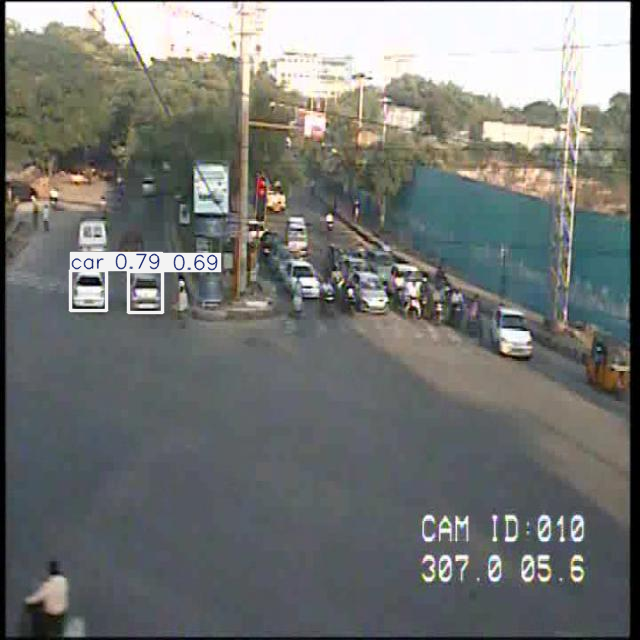

In [9]:
# Load the YOLO model
model = YOLO("yolov8n.pt")

# Specify the image path
image_path = "/content/Accident-detection-model-1/test/images"  # Update this with the correct image name

# Run inference
results = model(image_path, conf=0.5)

# Display the first result (in case of multiple results)
results[0].show()  # Access the first item in the list and display


In [10]:
# Load the best-trained model
model = YOLO("runs/detect/train/weights/best.pt")


In [11]:
model.export(format="torchscript")  # Export as TorchScript model
model.export(format="onnx")         # Export as ONNX model
model.export(format="engine")       # Export as TensorRT model



Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)

TorchScript: starting export with torch 2.6.0+cu124...
TorchScript: export success ✅ 5.2s, saved as 'runs/detect/train/weights/best.torchscript' (11.9 MB)

Export complete (7.8s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.torchscript imgsz=640 data=/content/Accident-detection-model-1/data.yaml  
Visualize:       https://netron.app
Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting

'runs/detect/train/weights/best.engine'

In [21]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("runs/detect/train/weights/best.pt")

# Run validation on your dataset
results = model.val()  # This uses validation set from data.yaml


Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Accident-detection-model-1/valid/labels.cache... 369 images, 127 backgrounds, 0 corrupt: 100%|██████████| 369/369 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.05it/s]


                   all        369        286      0.769      0.692      0.759      0.338
Speed: 1.5ms preprocess, 4.3ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val


In [26]:
from ultralytics import YOLO

# Load trained model
model = YOLO("runs/detect/train/weights/best.pt")

# Validate the model — this will generate confusion matrix & metrics
results = model.val()

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Accident-detection-model-1/valid/labels.cache... 369 images, 127 backgrounds, 0 corrupt: 100%|██████████| 369/369 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.31it/s]


                   all        369        286      0.769      0.692      0.759      0.338
Speed: 2.8ms preprocess, 4.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val2


In [27]:
import os

# Check recent validation folder
print("📂 Validation output folders:")
print(os.listdir("runs/detect"))


📂 Validation output folders:
['val', 'train', 'val2']


In [28]:
print("📁 Files in val folder:")
print(os.listdir("runs/detect/val"))


📁 Files in val folder:
['val_batch2_labels.jpg', 'F1_curve.png', 'val_batch1_pred.jpg', 'PR_curve.png', 'confusion_matrix.png', 'val_batch0_labels.jpg', 'R_curve.png', 'P_curve.png', 'val_batch2_pred.jpg', 'confusion_matrix_normalized.png', 'val_batch1_labels.jpg', 'val_batch0_pred.jpg']


In [31]:
import shutil
shutil.rmtree("runs/detect/val", ignore_errors=True)


In [33]:
import os

val_path = "runs/detect/val"
if os.path.exists(val_path):
    print("✅ Validation folder exists. Files inside:")
    print(os.listdir(val_path))
else:
    print("❌ Validation folder not created.")


✅ Validation folder exists. Files inside:
['val_batch2_labels.jpg', 'F1_curve.png', 'val_batch1_pred.jpg', 'PR_curve.png', 'confusion_matrix.png', 'val_batch0_labels.jpg', 'R_curve.png', 'P_curve.png', 'val_batch2_pred.jpg', 'confusion_matrix_normalized.png', 'val_batch1_labels.jpg', 'val_batch0_pred.jpg']


In [35]:
with open("/content/Accident-detection-model-1/data.yaml", "r") as f:
    print(f.read())


names:
- Accident
nc: 1
roboflow:
  license: CC BY 4.0
  project: accident-detection-model-1mcto
  url: https://universe.roboflow.com/harsha-ovlak/accident-detection-model-1mcto/dataset/1
  version: 1
  workspace: harsha-ovlak
test: ../test/images
train: ../train/images
val: ../valid/images



In [36]:
yaml_path = "/content/Accident-detection-model-1/data.yaml"

with open(yaml_path, "r") as f:
    lines = f.readlines()

with open(yaml_path, "w") as f:
    for line in lines:
        if line.startswith("val:"):
            f.write("val: /content/Accident-detection-model-1/test/images\n")
        else:
            f.write(line)


In [43]:
# Given values from the confusion matrix
true_positive = 218  # Accident correctly classified
false_negative = 81  # Accident misclassified as background
false_positive = 68  # Background misclassified as accident

# Total samples (assuming binary classification with implicit True Negative count)
total_samples = true_positive + false_negative + false_positive

# Calculate accuracy (assuming binary classification)
accuracy = true_positive / total_samples

accuracy

0.5940054495912807

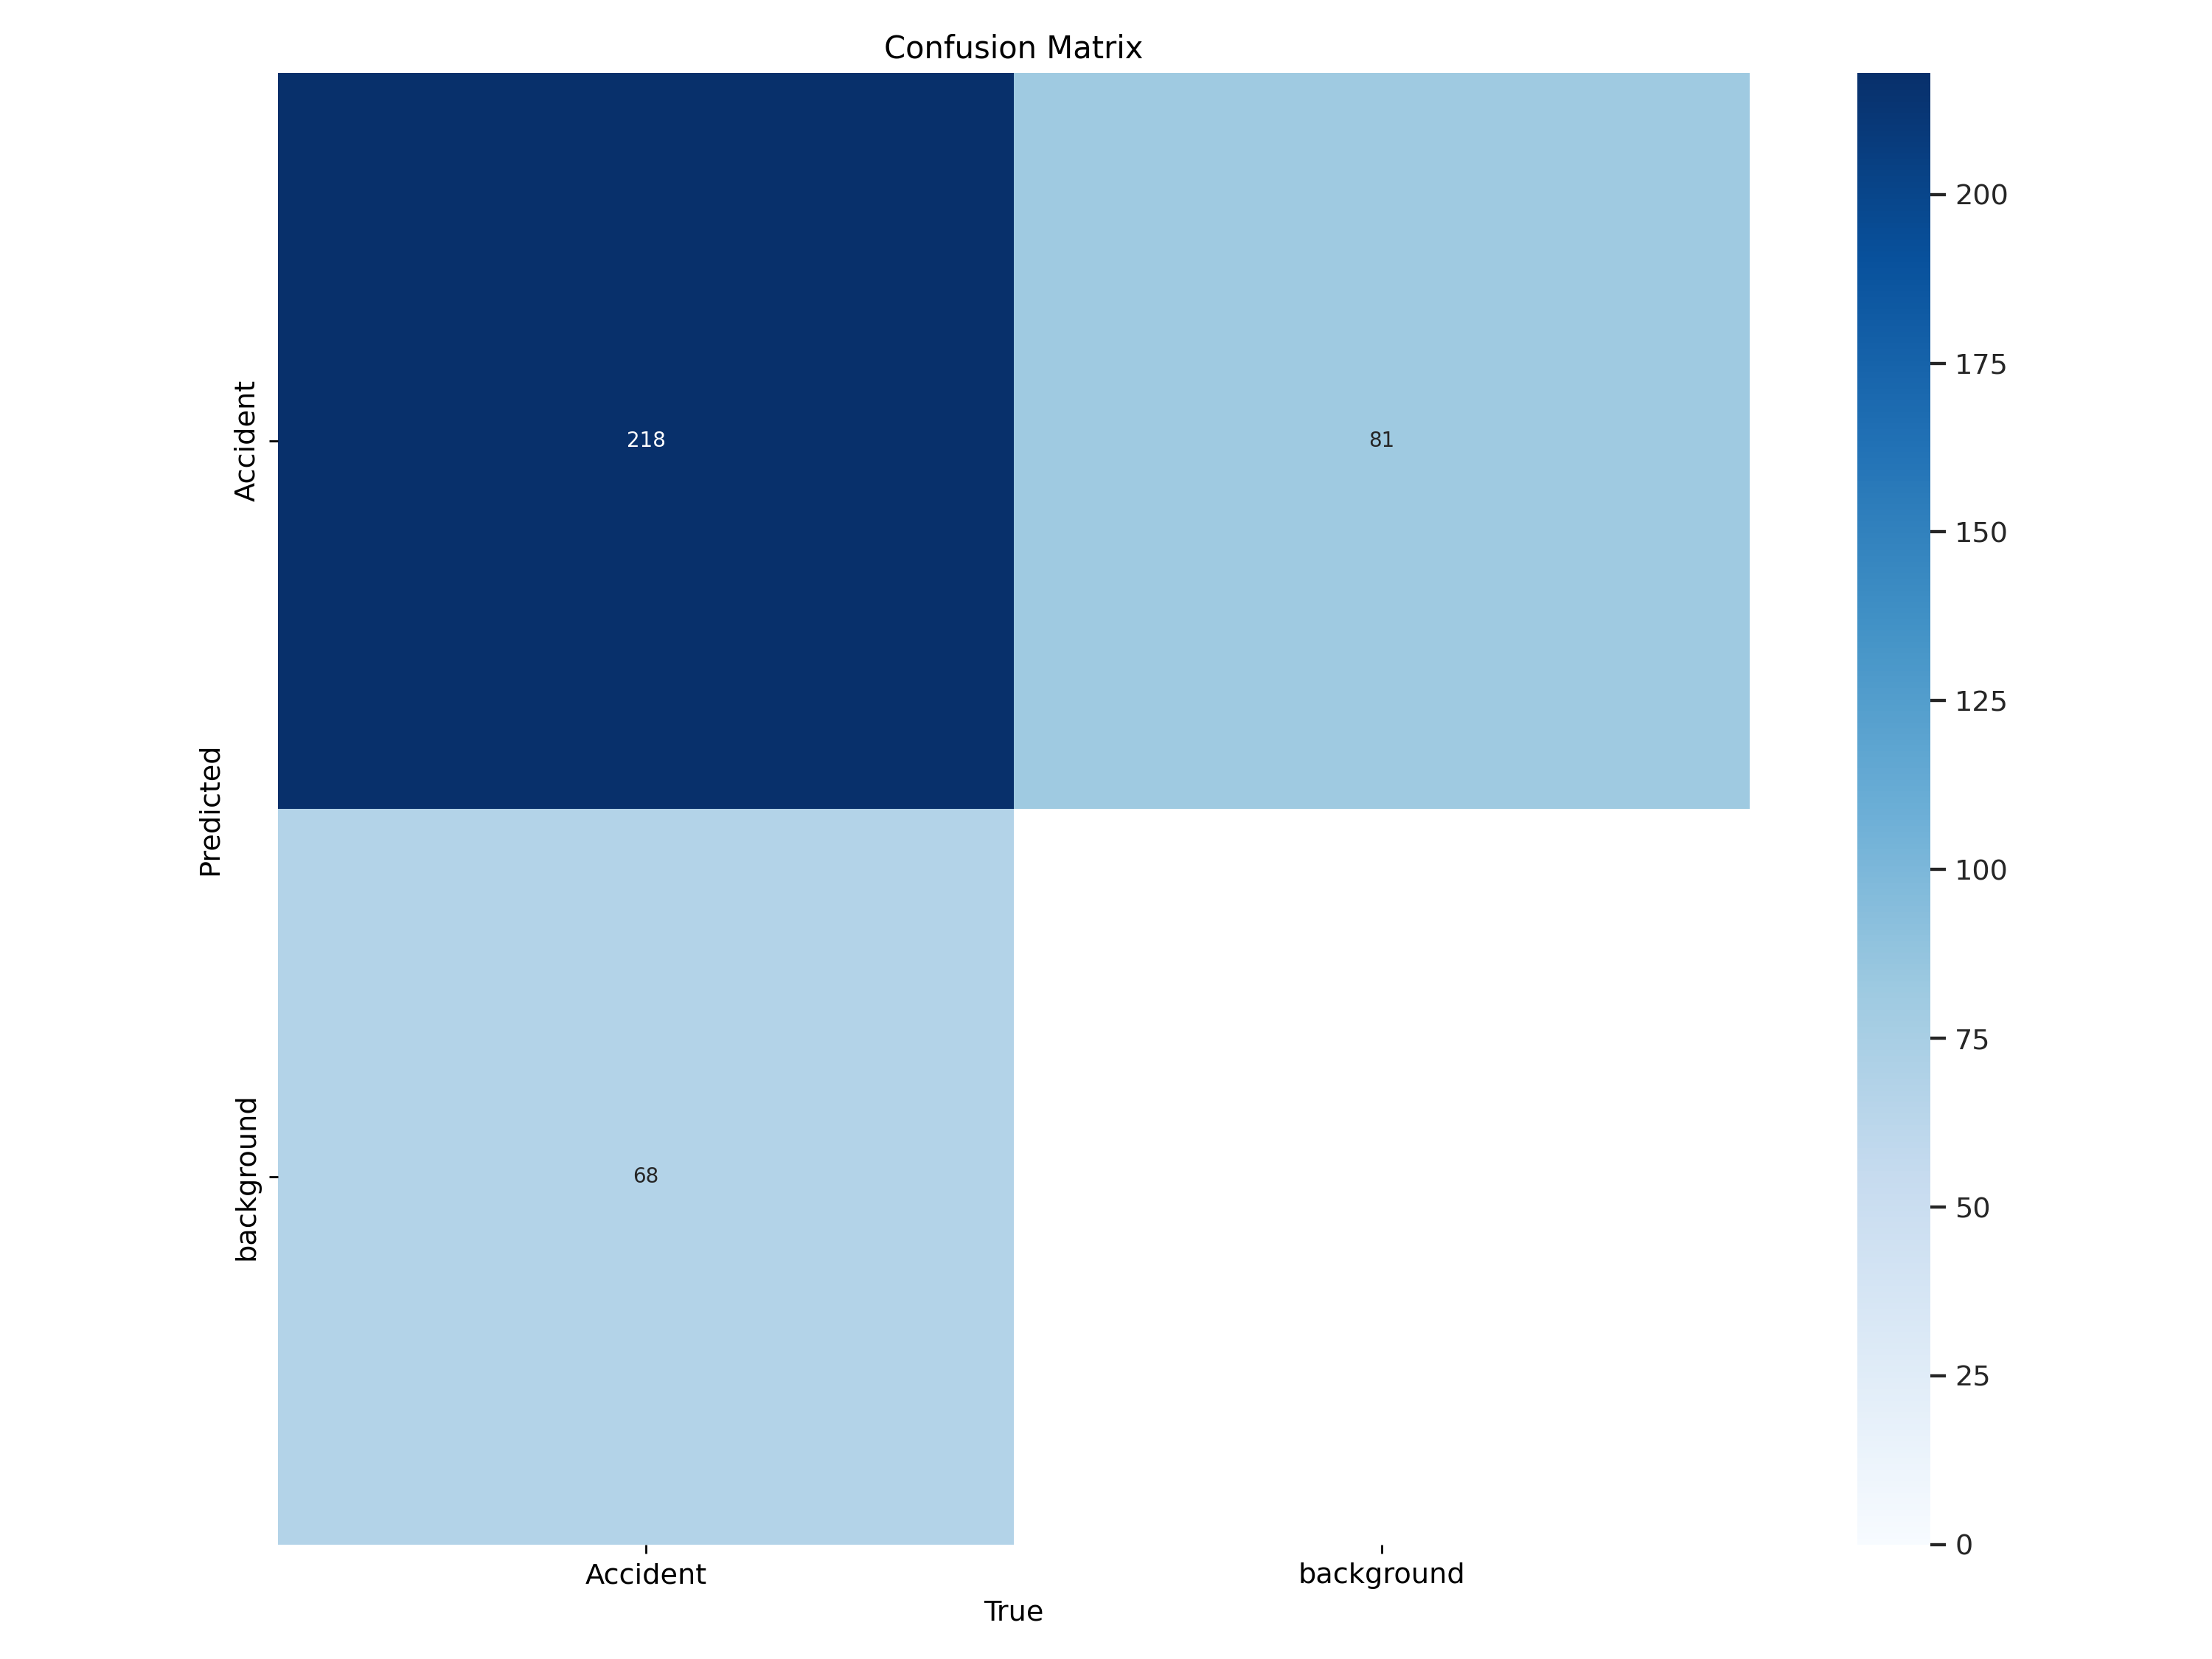

In [39]:
from IPython.display import Image, display

# Show only confusion matrix
display(Image(filename="runs/detect/val/confusion_matrix.png"))